In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [2]:
regression_type = 'RIDGE'

In [3]:
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [4]:
batch_size = 50

x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

seed = 13
np.random.seed(seed)
tf.set_random_seed(seed)

A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data, A), b)

In [5]:
if regression_type == 'LASSO':
    lasso_param = tf.constant(0.9)
    heavyside_step = tf.truediv(1., tf.add(1., tf.exp(tf.multiply(-50., tf.subtract(A, lasso_param)))))
    regularization_param = tf.multiply(heavyside_step, 99.)
    loss = tf.add(tf.reduce_mean(tf.square(y_target - model_output)), regularization_param)

elif regression_type == 'RIDGE':
    ridge_param = tf.constant(1.)
    ridge_loss = tf.reduce_mean(tf.square(A))
    loss = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), tf.multiply(ridge_param, ridge_loss)), 0)

else:
    print('Invalid regression_type parameter value',file=sys.stderr)

In [6]:
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [7]:
loss_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if (i+1)%300==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))
        print('\n')

Step #300 A = [[ 1.70595658]] b = [[ 1.55541849]]
Loss = [ 8.26485252]


Step #600 A = [[ 1.61488783]] b = [[ 2.56744456]]
Loss = [ 4.79188538]


Step #900 A = [[ 1.34542716]] b = [[ 3.24855161]]
Loss = [ 3.07603455]


Step #1200 A = [[ 1.11086905]] b = [[ 3.76259446]]
Loss = [ 2.06162453]


Step #1500 A = [[ 0.93269861]] b = [[ 4.15556765]]
Loss = [ 1.48733997]




In [8]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

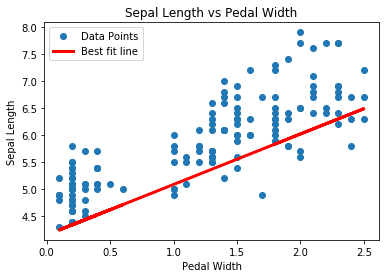

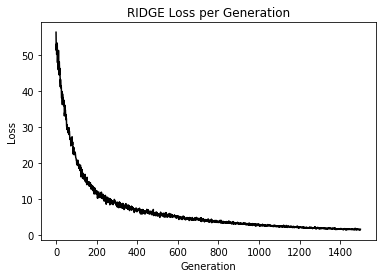

In [9]:
%matplotlib inline
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

plt.plot(loss_vec, 'k-')
plt.title(regression_type + ' Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()